In [3]:
import numpy as np
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [4]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [5]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [7]:
%timeit bogosort(x)

13.8 µs ± 90.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
X = np.random.rand(10, 2)

In [19]:
X

array([[0.16421795, 0.62639907],
       [0.6745886 , 0.29483844],
       [0.18455289, 0.50762186],
       [0.6326963 , 0.58226133],
       [0.59233749, 0.38733876],
       [0.07906533, 0.41209571],
       [0.63970403, 0.09718156],
       [0.10093492, 0.17738818],
       [0.46789317, 0.31097729],
       [0.35026937, 0.85830899]])

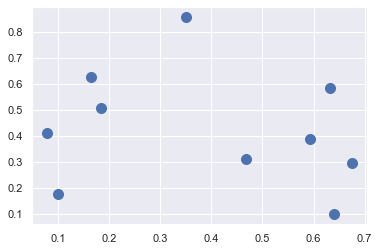

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [21]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

In [22]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [23]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [24]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [25]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 2 5 9 8 7 3 4 1 6]
 [1 4 6 8 3 2 7 5 0 9]
 [2 0 5 7 8 9 4 3 1 6]
 [3 4 1 8 9 2 0 6 5 7]
 [4 1 8 3 6 2 0 5 9 7]
 [5 2 0 7 8 4 9 3 1 6]
 [6 1 8 4 3 7 2 5 0 9]
 [7 5 2 8 0 4 6 1 3 9]
 [8 4 1 6 3 2 7 5 0 9]
 [9 0 2 3 5 4 8 1 7 6]]


In [27]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

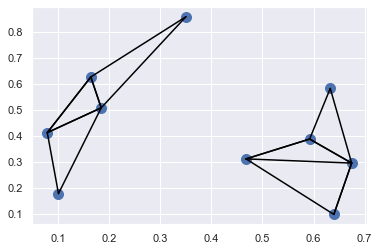

In [29]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

## Structured Data: NumPy’s Structured Arrays